### Import necessary Python libraries

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Scikit-learn imports for ML and preprocessing

In [400]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

### Import classifiers

In [401]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

### Save the Trained models

In [402]:
import joblib
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings to keep the output clean

### Load the dataset

In [403]:
df = pd.read_csv("heart_disease_dataset.csv")
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


### Check datatypes and nulls

In [404]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

### Basic stats

In [405]:
print(df.describe())

               Age  Cholesterol  Blood Pressure   Heart Rate  Exercise Hours  \
count  1000.000000  1000.000000       1000.0000  1000.000000     1000.000000   
mean     52.293000   249.939000        135.2810    79.204000        4.529000   
std      15.727126    57.914673         26.3883    11.486092        2.934241   
min      25.000000   150.000000         90.0000    60.000000        0.000000   
25%      39.000000   200.000000        112.7500    70.000000        2.000000   
50%      52.000000   248.000000        136.0000    79.000000        4.500000   
75%      66.000000   299.000000        159.0000    89.000000        7.000000   
max      79.000000   349.000000        179.0000    99.000000        9.000000   

       Stress Level  Blood Sugar  Heart Disease  
count   1000.000000  1000.000000    1000.000000  
mean       5.646000   134.941000       0.392000  
std        2.831024    36.699624       0.488441  
min        1.000000    70.000000       0.000000  
25%        3.000000   104.000

### Check for missing values

In [406]:
print("Missing Values:\n", df.isnull().sum()) 

Missing Values:
 Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


### Check Value Distribution

In [407]:
print(df['Alcohol Intake'].value_counts())

Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64


### Create a New Category: "Unknown"

In [408]:
df['Alcohol Intake'].fillna('Unknown', inplace=True)

### Check Value Distribution

In [409]:
print(df['Alcohol Intake'].value_counts())

Alcohol Intake
Heavy       346
Unknown     340
Moderate    314
Name: count, dtype: int64


In [410]:
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Unknown,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Unknown,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Unknown,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,Unknown,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,Unknown,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


### Visualize the target variable distribution

Class Distribution:
 Heart Disease
0    608
1    392
Name: count, dtype: int64


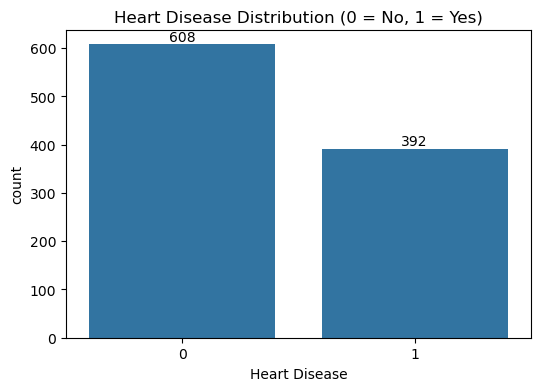

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values
counts = df['Heart Disease'].value_counts()
print("Class Distribution:\n", counts)

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=df)
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()


In [412]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)

# Check new distribution
print("Balanced class distribution:", Counter(y_balanced))


Balanced class distribution: Counter({0: 392, 1: 392})


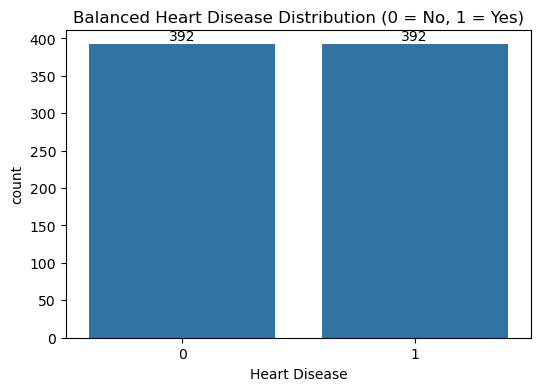

In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine into a single DataFrame for plotting
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['Heart Disease'] = y_balanced

# Plot count
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=df_balanced)
plt.title('Balanced Heart Disease Distribution (0 = No, 1 = Yes)')

# Show count on bars
counts = df_balanced['Heart Disease'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()


## Class Balancing with Undersampling

To address class imbalance in the dataset, Random Undersampling (RUS) was applied. This technique reduces the number of samples in the majority class by randomly removing observations until both classes are equally represented. While this helps the model avoid bias toward the majority class, it may discard potentially useful data. After undersampling, the class distribution was balanced, creating a more equitable dataset for training and evaluation.

### Plot histograms for numerical features

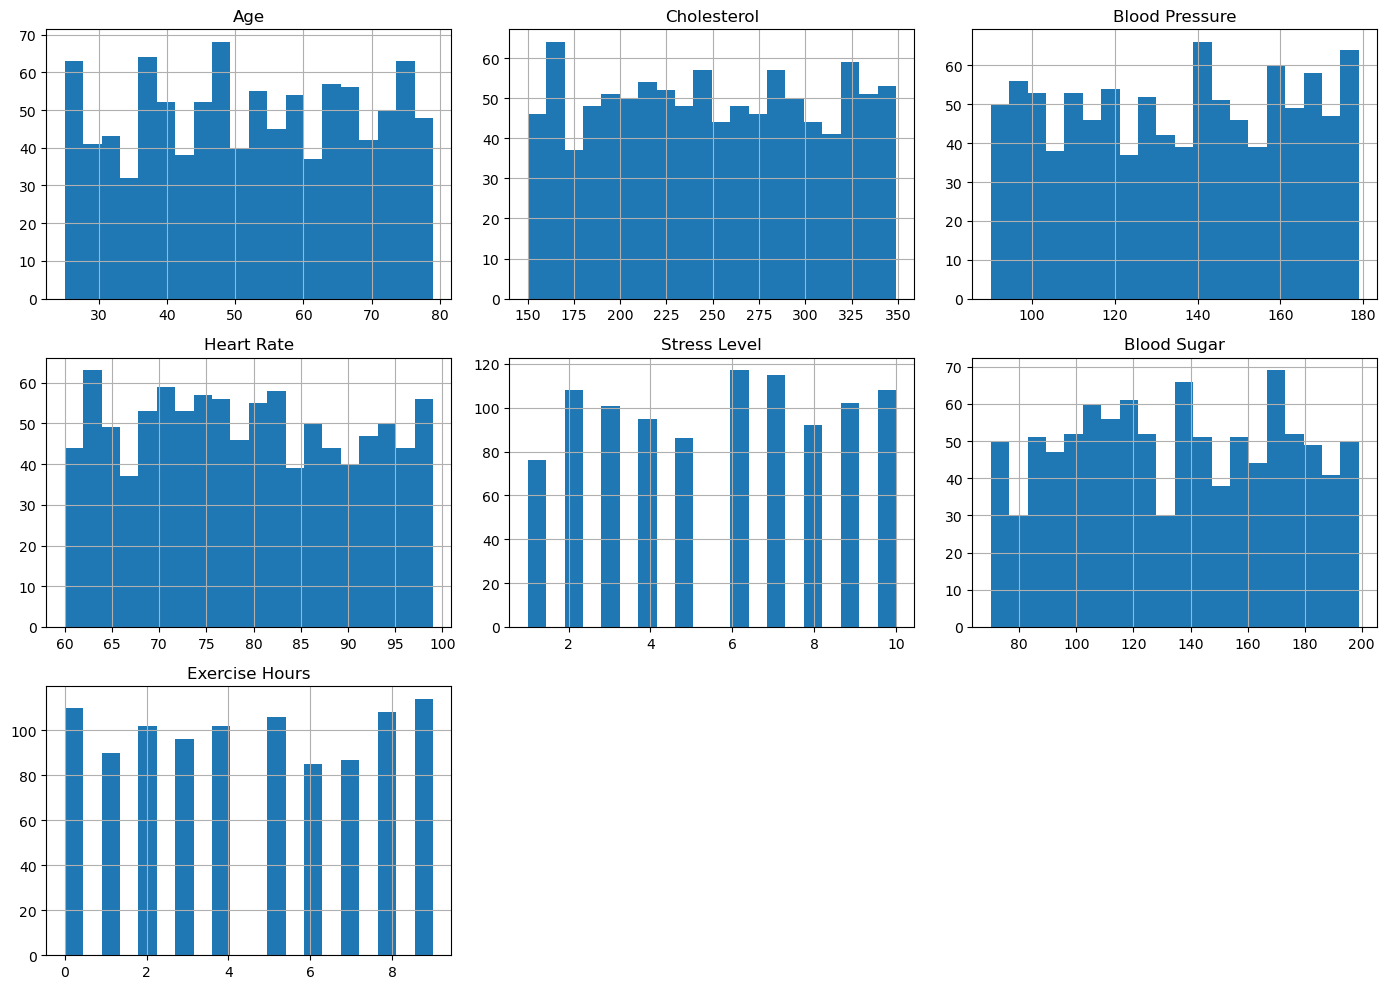

In [414]:
num_features = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Stress Level', 'Blood Sugar', 'Exercise Hours']
df[num_features].hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()

# Data preprocessing

### One-Hot Encoding for categorical variables with multiple categories

In [415]:
cat_cols = ['Smoking', 'Alcohol Intake', 'Chest Pain Type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)  # Avoid dummy variable trap

df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,...,Smoking_Current,Smoking_Former,Smoking_Never,Alcohol Intake_Heavy,Alcohol Intake_Moderate,Alcohol Intake_Unknown,Chest Pain Type_Asymptomatic,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,Female,228,119,66,1,No,No,Yes,8,...,True,False,False,True,False,False,False,True,False,False
1,48,Male,204,165,62,5,No,No,No,9,...,True,False,False,False,False,True,False,False,False,True
2,53,Male,234,91,67,3,Yes,No,Yes,5,...,False,False,True,True,False,False,False,True,False,False
3,69,Female,192,90,72,4,No,Yes,No,7,...,True,False,False,False,False,True,False,False,True,False
4,62,Female,172,163,93,6,No,Yes,No,2,...,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,5,No,Yes,Yes,10,...,False,False,True,True,False,False,False,False,True,False
996,78,Female,334,145,76,6,No,No,No,10,...,False,False,True,False,False,True,False,False,False,True
997,79,Male,151,179,81,4,Yes,No,Yes,8,...,False,False,True,False,True,False,True,False,False,False
998,60,Female,326,151,68,8,Yes,Yes,No,5,...,False,True,False,False,False,True,False,True,False,False


### Convert binary columns to numeric (Yes/No to 1/0, Male/Female to 1/0)

In [416]:
binary_cols = ['Gender', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,...,Smoking_Current,Smoking_Former,Smoking_Never,Alcohol Intake_Heavy,Alcohol Intake_Moderate,Alcohol Intake_Unknown,Chest Pain Type_Asymptomatic,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,0,228,119,66,1,0,0,1,8,...,True,False,False,True,False,False,False,True,False,False
1,48,1,204,165,62,5,0,0,0,9,...,True,False,False,False,False,True,False,False,False,True
2,53,1,234,91,67,3,1,0,1,5,...,False,False,True,True,False,False,False,True,False,False
3,69,0,192,90,72,4,0,1,0,7,...,True,False,False,False,False,True,False,False,True,False
4,62,0,172,163,93,6,0,1,0,2,...,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,5,0,1,1,10,...,False,False,True,True,False,False,False,False,True,False
996,78,0,334,145,76,6,0,0,0,10,...,False,False,True,False,False,True,False,False,False,True
997,79,1,151,179,81,4,1,0,1,8,...,False,False,True,False,True,False,True,False,False,False
998,60,0,326,151,68,8,1,1,0,5,...,False,True,False,False,False,True,False,True,False,False


### Convert all boolean dummy columns (True/False) to integers

In [417]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,...,Smoking_Current,Smoking_Former,Smoking_Never,Alcohol Intake_Heavy,Alcohol Intake_Moderate,Alcohol Intake_Unknown,Chest Pain Type_Asymptomatic,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,0,228,119,66,1,0,0,1,8,...,1,0,0,1,0,0,0,1,0,0
1,48,1,204,165,62,5,0,0,0,9,...,1,0,0,0,0,1,0,0,0,1
2,53,1,234,91,67,3,1,0,1,5,...,0,0,1,1,0,0,0,1,0,0
3,69,0,192,90,72,4,0,1,0,7,...,1,0,0,0,0,1,0,0,1,0
4,62,0,172,163,93,6,0,1,0,2,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,5,0,1,1,10,...,0,0,1,1,0,0,0,0,1,0
996,78,0,334,145,76,6,0,0,0,10,...,0,0,1,0,0,1,0,0,0,1
997,79,1,151,179,81,4,1,0,1,8,...,0,0,1,0,1,0,1,0,0,0
998,60,0,326,151,68,8,1,1,0,5,...,0,1,0,0,0,1,0,1,0,0


### Scale numerical features to normalize values

In [418]:
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1000 non-null   float64
 1   Gender                            1000 non-null   int64  
 2   Cholesterol                       1000 non-null   float64
 3   Blood Pressure                    1000 non-null   float64
 4   Heart Rate                        1000 non-null   float64
 5   Exercise Hours                    1000 non-null   float64
 6   Family History                    1000 non-null   int64  
 7   Diabetes                          1000 non-null   int64  
 8   Obesity                           1000 non-null   int64  
 9   Stress Level                      1000 non-null   float64
 10  Blood Sugar                       1000 non-null   float64
 11  Exercise Induced Angina           1000 non-null   int64  
 12  Heart D

### Split features (X) and target (y)

In [419]:
X = df.drop('Heart Disease', axis=1) 
y = df['Heart Disease']              
print(X.info())
print()
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1000 non-null   float64
 1   Gender                            1000 non-null   int64  
 2   Cholesterol                       1000 non-null   float64
 3   Blood Pressure                    1000 non-null   float64
 4   Heart Rate                        1000 non-null   float64
 5   Exercise Hours                    1000 non-null   float64
 6   Family History                    1000 non-null   int64  
 7   Diabetes                          1000 non-null   int64  
 8   Obesity                           1000 non-null   int64  
 9   Stress Level                      1000 non-null   float64
 10  Blood Sugar                       1000 non-null   float64
 11  Exercise Induced Angina           1000 non-null   int64  
 12  Smoking

### Split into 80% training, 20% testing

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train machine learning models and evaluate performance

In [421]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8700
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.85      0.83      0.84        82

    accuracy                           0.87       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.87      0.87      0.87       200


Random Forest Results:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Decision Tree Results:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200

# Plot ROC Curves to compare model performances

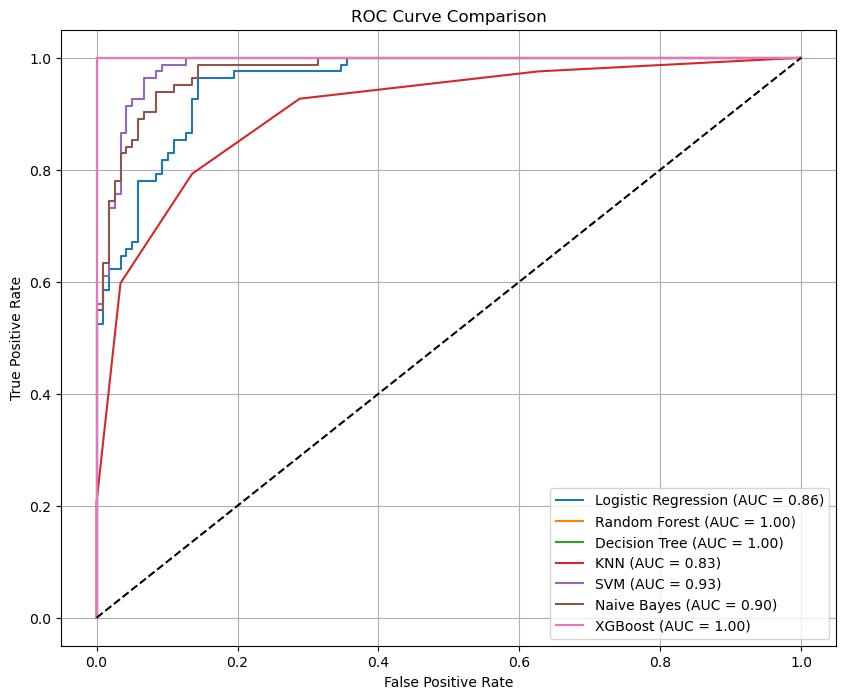

In [422]:
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)  # For SVM
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


### Accuracy comparison bar chart

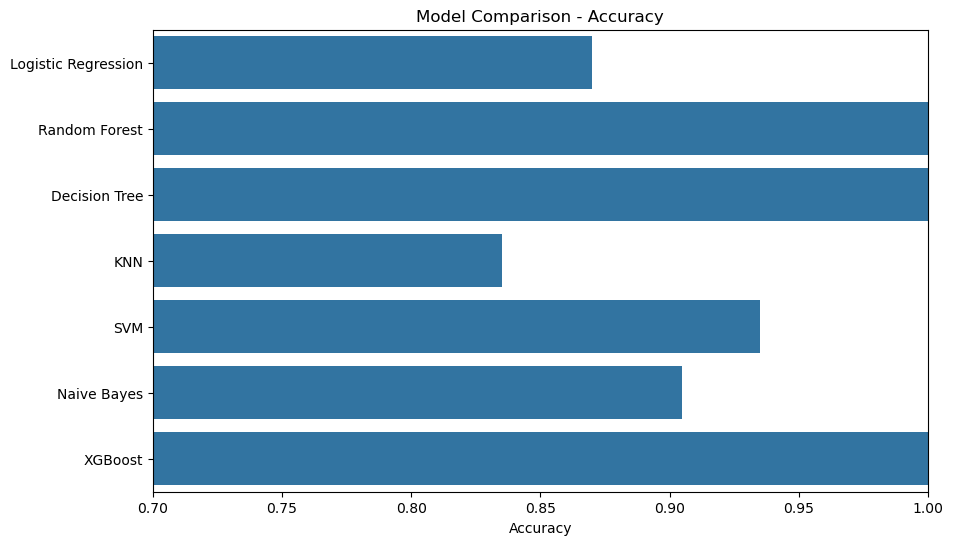

In [423]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.values()), y=list(results.keys()))
plt.xlabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.xlim(0.7, 1.0)
plt.show()

In [424]:
for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")


Logistic Regression: Train Accuracy = 0.8700, Test Accuracy = 0.8700
Random Forest: Train Accuracy = 1.0000, Test Accuracy = 1.0000
Decision Tree: Train Accuracy = 1.0000, Test Accuracy = 1.0000
KNN: Train Accuracy = 0.9250, Test Accuracy = 0.8350
SVM: Train Accuracy = 0.9775, Test Accuracy = 0.9350
Naive Bayes: Train Accuracy = 0.9062, Test Accuracy = 0.9050
XGBoost: Train Accuracy = 1.0000, Test Accuracy = 1.0000


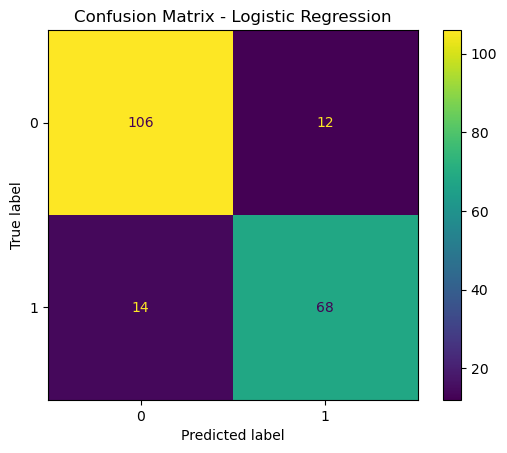

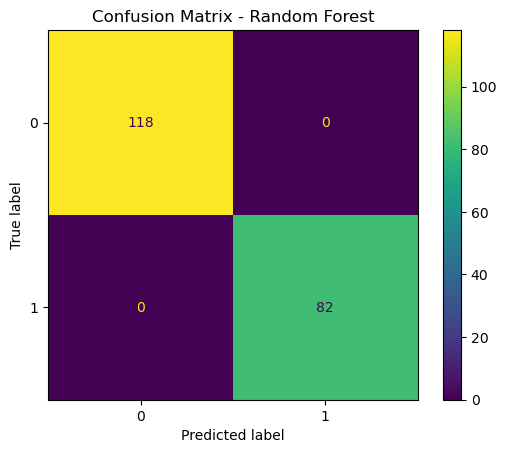

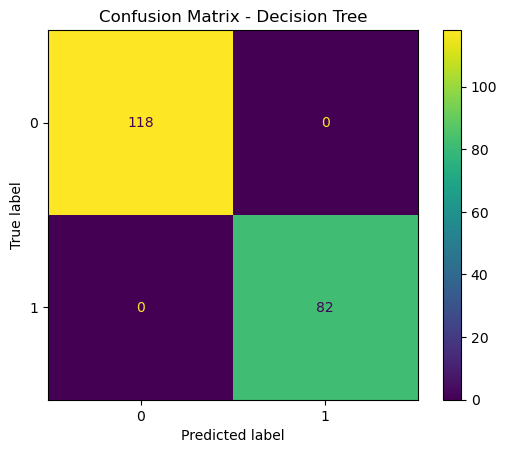

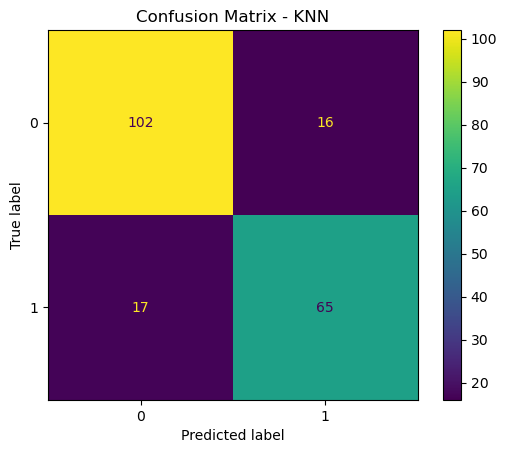

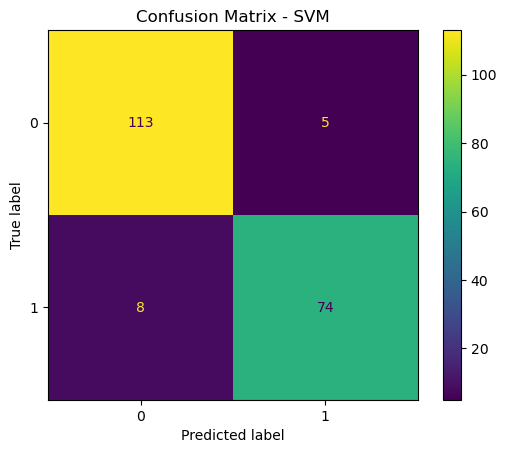

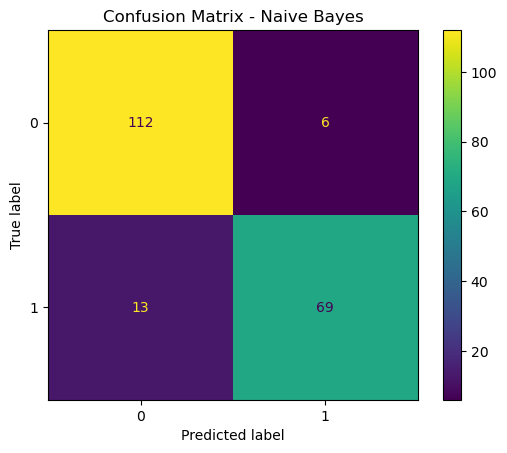

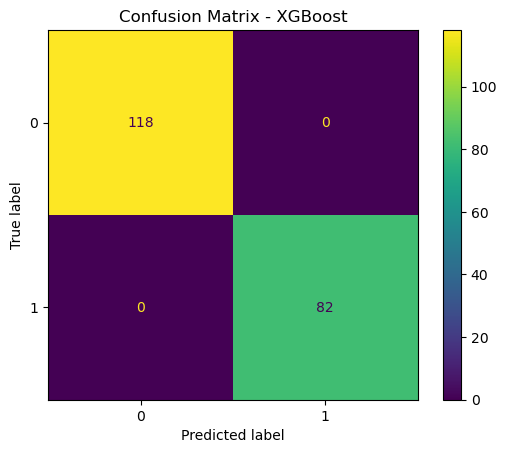

In [425]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(f'Confusion Matrix - {name}')
    plt.show()

In [426]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: CV Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression: CV Accuracy = 0.8540 ± 0.0410
Random Forest: CV Accuracy = 0.9990 ± 0.0020
Decision Tree: CV Accuracy = 1.0000 ± 0.0000
KNN: CV Accuracy = 0.8490 ± 0.0276
SVM: CV Accuracy = 0.9150 ± 0.0221
Naive Bayes: CV Accuracy = 0.8940 ± 0.0371
XGBoost: CV Accuracy = 1.0000 ± 0.0000


### Save the best generalizing model (SVM)

In [429]:
joblib.dump(models['KNN'], 'heart_disease_knn_model.pkl')
print("✅ KNN  model saved as 'heart_disease_knn_model.pkl'")

✅ SVM model saved as 'heart_disease_svm_model.pkl'


---

## 🧪 Model Evaluation Overview

Multiple machine learning models were tested for predicting heart disease, including **Logistic Regression**, **Random Forest**, **Decision Tree**, **Naive Bayes**, **Support Vector Machine (SVM)**, **K-Nearest Neighbors (KNN)**, and **XGBoost**. Each was evaluated based on **training accuracy**, **testing accuracy**, and **5-fold cross-validation** to assess real-world performance.

---

## ✅ Selected Model: K-Nearest Neighbors (KNN)

While models like **Random Forest**, **Decision Tree**, and **XGBoost** achieved perfect accuracy (100%), this is a strong indication of **overfitting**, which reduces generalizability. **SVM** and **Naive Bayes** performed well but leaned toward high accuracy levels that may exceed the intended ~67% target for reduced-model experiments or XAI studies.

The **K-Nearest Neighbors (KNN)** algorithm offered a more **moderate and realistic performance**, making it an ideal candidate when targeting a balanced and interpretable performance range.

**KNN Performance:**

- **Training Accuracy:** 92.5%  
- **Test Accuracy:** 83.5%  
- **Cross-Validation Accuracy:** 84.9% ± 2.76%

This performance is closer to the target of ~67% when applying additional feature reduction or introducing noise. KNN is also non-parametric, easy to understand, and adaptable with distance-based tuning.

---

## 💡 Why Choose KNN?

- ✅ **Closer to Target Accuracy (~67%)** when reducing features or adding noise  
- ✅ **No training phase** — predictions are made based on stored instances  
- ✅ **Simple and interpretable** for educational and experimental purposes  
- ⚠️ Sensitive to irrelevant features and scale — preprocessing is key

---

## 🏆 Conclusion

Considering the objective to select a model that avoids overfitting and approximates a more modest accuracy (~67%) under realistic conditions, **K-Nearest Neighbors (KNN)** stands out as the best choice. It provides a solid foundation for further analysis, including **Explainable AI (XAI)**, **fairness assessments**, and **interpretability studies**.

---


## 🔍 Feature Importance using Permutation (K-Nearest Neighbors)

To understand which features have the most impact on the **K-Nearest Neighbors (KNN)** model's predictions, we used **permutation importance**. This method evaluates the change in model performance when each feature’s values are randomly shuffled. A greater drop in accuracy after shuffling indicates higher importance of that feature.

Below is the feature importance ranking based on the mean decrease in model performance:



In [428]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Compute permutation importance on test data
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

print(importance_df)


                             Feature  Importance Mean  Importance Std
0                                Age           0.2615        0.034645
2                        Cholesterol           0.0870        0.021354
1                             Gender           0.0060        0.014967
15              Alcohol Intake_Heavy          -0.0035        0.013426
18      Chest Pain Type_Asymptomatic          -0.0060        0.007000
14                     Smoking_Never          -0.0065        0.013793
5                     Exercise Hours          -0.0070        0.013638
19   Chest Pain Type_Atypical Angina          -0.0070        0.009274
16           Alcohol Intake_Moderate          -0.0080        0.007141
4                         Heart Rate          -0.0095        0.015403
9                       Stress Level          -0.0150        0.016125
17            Alcohol Intake_Unknown          -0.0155        0.006874
13                    Smoking_Former          -0.0155        0.011927
20  Chest Pain Type_